# Neural Network
---

![fig1](./figs/NN_1.jpg)

$$
a = b + w_1x_1 + w_2x_2\\
y = h(a)
$$

## 활성화 함수

* 비선형 함수를 써야함

### 계단함수

In [1]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

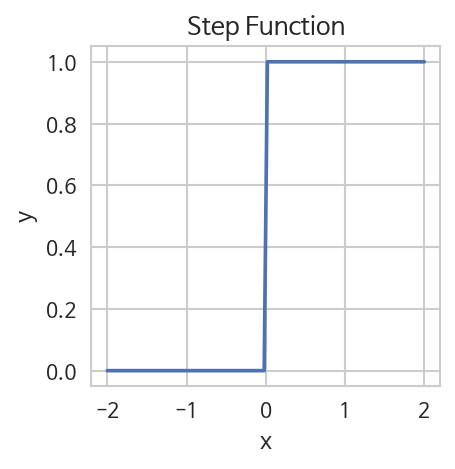

In [5]:
xx = np.linspace(-2, 2, 100)
yy = step_function(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

### 시그모이드 함수

$$h(x) = \frac{1}{1+exp(-x)}$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

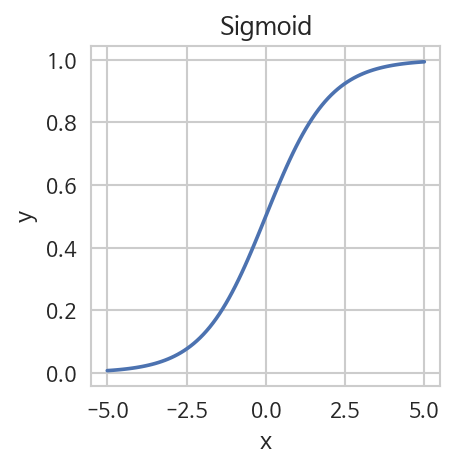

In [8]:
xx = np.linspace(-5, 5, 100)
yy = sigmoid(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

### ReLu 함수

$$
h(x) = 
\begin{cases}
  x\ \ (x > 0) \\
  0\ \ (x \leq 0) \\ 
\end{cases}
$$

In [9]:
def ReLu(x):
    return np.maximum(0, x)

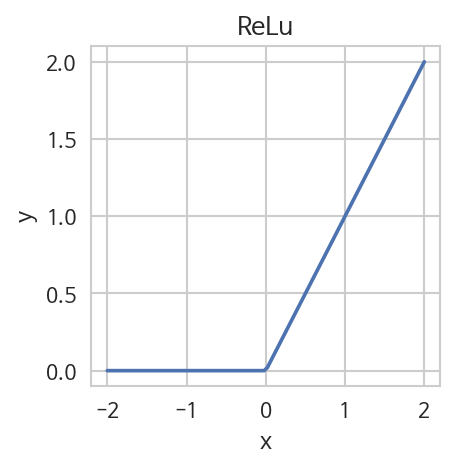

In [12]:
xx = np.linspace(-2, 2, 100)
yy = ReLu(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("ReLu")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

## FeedForward

![fig2](./figs/NN_2.jpg)

In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print('X:', X.shape)
print('W1:', W1.shape)
print('B1:', B1.shape)
# Input -> Hidden 1
print('=================')
print('Input -> Hidden1')
print('=================')
# linear sum
A1 = np.dot(W1, X) + B1
print('A1:', A1.shape)
print(A1)
# activation
Z1 = sigmoid(A1)
print('Z1:', Z1.shape)
print(Z1)

X: (2,)
W1: (3, 2)
B1: (3,)
Input -> Hidden1
A1: (3,)
[ 0.3  0.7  1.1]
Z1: (3,)
[ 0.57444252  0.66818777  0.75026011]


In [24]:
W2 = np.array([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6]])
B2 = np.array([0.1, 0.2])

print('Z1:', Z1.shape)
print('W2:', W2.shape)
print('B2:', B2.shape)
# Hidden 1 -> Hidden 2
print('=================')
print('Hidden 1 -> Hidden 2')
print('=================')
# linear sum
A2 = np.dot(W2, Z1) + B2
print('A2:', A2.shape)
print(A2)
# activation
Z2 = sigmoid(A2)
print('Z2:', Z2.shape)
print(Z2)

Z1: (3,)
W2: (2, 3)
B2: (2,)
Hidden 1 -> Hidden 2
A2: (2,)
[ 0.51615984  1.21402696]
Z2: (2,)
[ 0.62624937  0.7710107 ]


In [25]:
def identity_function(x):
    return x

In [28]:
W3 = np.array([[0.1, 0.2],
               [0.3, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(W3, Z2) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### Softmax

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}$$

In [34]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

overflow 문제 있음, 지수함수는 엄청난 큰 수를 출력하기 때문에 컴퓨터로 계산시 문제 발생함

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}} 
\\ = \frac{Cexp(a_k)}{C\sum_{i=1}^{n}{exp(a_i)}} 
\\ = \frac{exp(a_k+\log{C})}{\sum_{i=1}^{n}{exp(a_i+\log{C})}} 
\\ = \frac{exp(a_k+C^{'})}{\sum_{i=1}^{n}{exp(a_i+C^{'})}} 
$$

이것을 막을 목적으로 입력 신호 중 최대값을 이용하는 것이 일반적

In [36]:
a = np.array([1010, 1000, 990])
softmax(a)

/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [38]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [39]:
softmax(a-c)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [40]:
def softmax(a):
    c = np.max(a)
    return np.exp(a - c) / np.sum(np.exp(a - c))

---

## sample_weight 저장, 피클

In [43]:
W = {}
W['W1'] = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
W['W2'] = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
W['W3'] = np.array([[0.1, 0.2], [0.3, 0.4]])
B = {}
B['B1'] = np.array([0.1, 0.2, 0.3])
B['B2'] = np.array([0.1, 0.2])
B['B3'] = np.array([0.1, 0.2])

In [44]:
W

{'W1': array([[ 0.1,  0.2],
        [ 0.3,  0.4],
        [ 0.5,  0.6]]), 'W2': array([[ 0.1,  0.2,  0.3],
        [ 0.4,  0.5,  0.6]]), 'W3': array([[ 0.1,  0.2],
        [ 0.3,  0.4]])}

In [45]:
B

{'B1': array([ 0.1,  0.2,  0.3]),
 'B2': array([ 0.1,  0.2]),
 'B3': array([ 0.1,  0.2])}

In [55]:
import pickle
output = open('sample_weight.pkl', 'wb')
pickle.dump([W, B], output)
output.close()

In [56]:
with open('sample_weight.pkl', 'rb') as f:
    sample_weight = pickle.load(f)

In [57]:
sample_weight

[{'W1': array([[ 0.1,  0.2],
         [ 0.3,  0.4],
         [ 0.5,  0.6]]), 'W2': array([[ 0.1,  0.2,  0.3],
         [ 0.4,  0.5,  0.6]]), 'W3': array([[ 0.1,  0.2],
         [ 0.3,  0.4]])},
 {'B1': array([ 0.1,  0.2,  0.3]),
  'B2': array([ 0.1,  0.2]),
  'B3': array([ 0.1,  0.2])}]

---

## MNIST 데이터

In [62]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [63]:
from PIL import Image

In [64]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [65]:
img = x_train[0]
label = t_train[0]
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

(784,)
(28, 28)


In [105]:
# init_weight for mnist
W = {'W1': np.random.normal(size=(50, 784)),  # W1(50, 784) X(784,)
     'W2': np.random.normal(size=(100, 50)),  # W2(100, 50) Z1(50,)
     'W3': np.random.normal(size=(10, 100)),}  # W3(10, 100) Z2(100,)
B = {'B1': np.random.normal(size=(50,100)),  # B1(50,)
     'B2': np.random.normal(size=(100,100)),  # B1(100,)
     'B3': np.random.normal(size=(10,100)),}  # B1(10,)

with open('mnist_weight.pkl', 'wb') as output:
    pickle.dump([W, B], output)

---

## NN구현

In [110]:
class NN(object):
    def __init__(self, case=0, batch_size=100):
        if case == 0:
            with open('sample_weight.pkl', 'rb') as f:
                sample_weight = pickle.load(f)
            self.W = sample_weight[0]
            self.B = sample_weight[1]
        elif case == 1:
            self.W = {'W1': np.random.normal(size=(50, 784)),  # W1(50, 784) X(784,batch_size)
                      'W2': np.random.normal(size=(100, 50)),  # W2(100, 50) Z1(50,batch_size)
                      'W3': np.random.normal(size=(10, 100)),}  # W3(10, 100) Z2(100,batch_size)
            self.B = {'B1': np.random.normal(size=(50, batch_size)),  # B1(50, batch_size)
                      'B2': np.random.normal(size=(100, batch_size)),  # B1(100, batch_size)
                      'B3': np.random.normal(size=(10, batch_size)),}  # B1(10, batch_size)
            self.batch = batch_size
    
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
        return x_train, t_train, x_test, t_test
    
    def predict(self, X):
        W1, W2, W3 = self.W['W1'], self.W['W2'], self.W['W3']
        B1, B2, B3 = self.B['B1'], self.B['B2'], self.B['B3']
        # Input -> Hidden 1
        A1 = np.dot(W1, X) + B1
        Z1 = sigmoid(A1)
        # Hidden 1 -> Hidden 2
        A2 = np.dot(W2, Z1) + B2
        Z2 = sigmoid(A2)
        # Hidden 2 -> Output
        A3 = np.dot(W3, Z2) + B3
        Y = softmax(A3)
        
        return Y

### case 0 : Example

In [97]:
X = np.array([1.0, 0.5])
model = NN(case=0)
Y = model.predict(X)
print(Y)

[ 0.40625907  0.59374093]


### case 1 : MNIST

In [113]:
model_mnist = NN(case=1)
x_train, t_train, x_test, t_test = model_mnist.get_data()
acc_count = 0
batch_size = 100
for i in range(0, len(x_train), batch_size):
    x_batch = x_train[i:i+batch_size].T  # 784, 100
    y_batch = model_mnist.predict(x_batch) # 10, 100
    p = np.argmax(y_batch, axis=0)
    acc_count += np.sum(p == t_train[i:i+batch_size])
print("accuracy:", acc_count / len(x_train))

accuracy: 0.0857833333333


---

# 학습: 역전파
---

## 손실함수

정확도를 학습 지표로 삼게 되면 미분 값이 대부분 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다.

In [151]:
y = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### 평균 제곱 오차 MSE
$$E=\frac{1}{2}\sum_{k}{(y_k - t_k)^2}$$

In [122]:
def mean_squared_error(y, t):
    return (1/2) * np.sum((y - t)**2)

In [123]:
mean_squared_error(y, t)

0.097500000000000031

### 교차 엔트로피 오차 Cross Entropy Error
$$E=\sum_{k}{t_k\log{y_k}}$$
$t_k$: 정답에 해당하는 인덱스의 원소 = 1, 나머지는 0 으로 된 원핫 인코딩

In [124]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [125]:
cross_entropy_error(y, t)

0.51082545709933802

#### 미니배치 학습

In [126]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [135]:
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + delta)) / batch_size

In [136]:
cross_entropy_error(y, t)

2.9957302735559908

## 수치 미분

$$\frac{df(x)}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x)}{h}}$$

In [156]:
# 나쁜구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(h)) / h

In [157]:
np.float32(1e-50) # 너무 작은 값은 컴퓨터로 표현할 수 가 없음

0.0

중심 차분
$$\frac{df(x)}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x-h)}{2h}}$$

In [158]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

예시

In [159]:
def f1(x):
    return 0.01 * x**2 + 0.1 * x

In [169]:
numerical_diff(f1, 5)

0.1999999999990898

In [166]:
[f1(5), f1(10)]

[0.75, 2.0]

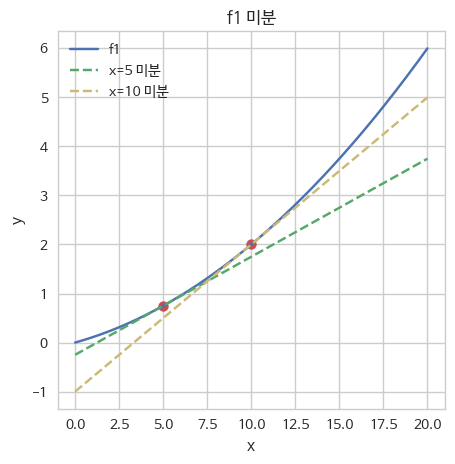

In [181]:
xx = np.linspace(0.0, 20.0, 1000)
yy = f1(xx)
plt.figure(figsize=(5, 5), dpi=100)
plt.title('f1 미분')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, yy, label='f1')
plt.scatter([5, 10], [f1(5), f1(10)], s=50, c='r')
b1 = f1(5) - numerical_diff(f1, 5)*5
plt.plot([0, 5, 20], [(numerical_diff(f1, 5)*0 + b1), f1(5), (numerical_diff(f1, 5)*20 + b1)], \
         'g--', label='x=5 미분')
b2 = f1(10) - numerical_diff(f1, 10)*10
plt.plot([0, 10, 20], [(numerical_diff(f1, 10)*0 + b2), f1(10), (numerical_diff(f1, 10)*20 + b2)], \
         'y--', label='x=10 미분')
plt.legend()
plt.show()

In [189]:
def f2(x):
    return x[0]**2 + x[1]**2

In [190]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)  # f(x + h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x - h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #원래 값 복원
    return grad 

In [191]:
numerical_gradient(f2, np.array([3., 4.]))

array([ 6.,  8.])

### 경사 하강법 Gradient Descent

ML/GD 에 찾을 것